In [60]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt


In [61]:
df=pd.read_csv("Startup.csv")
df

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


In [62]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
Profit             0
dtype: int64

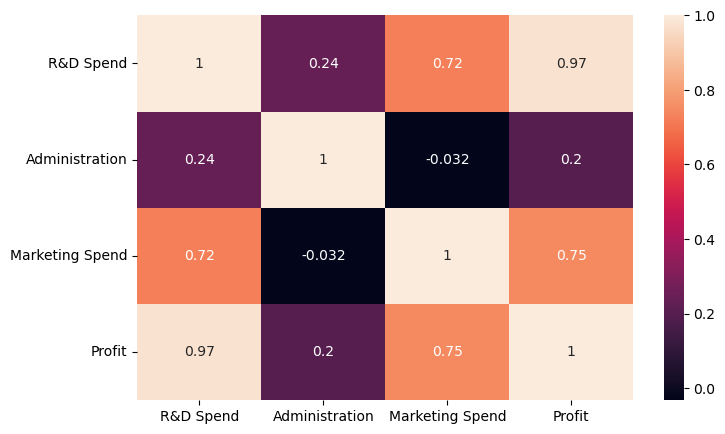

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt
 
plt.figure(figsize=(8, 5))
sns.heatmap(df.corr(), annot=True)
plt.show()

<AxesSubplot: xlabel='R&D Spend', ylabel='Profit'>

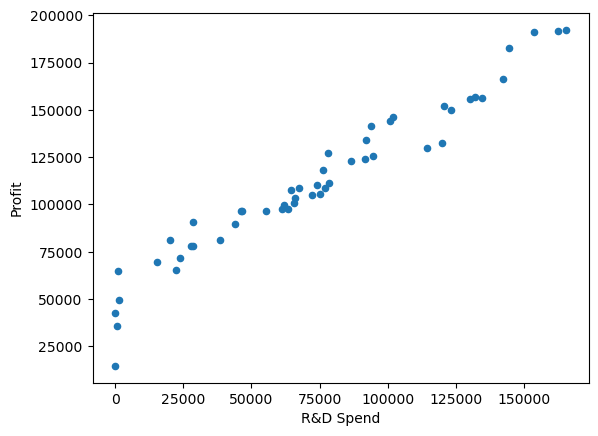

In [64]:
df.plot(kind='scatter',x='R&D Spend',y='Profit')

<AxesSubplot: xlabel='Marketing Spend', ylabel='Profit'>

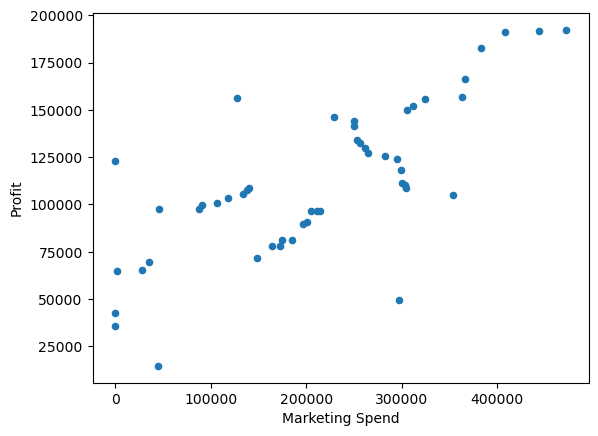

In [65]:
df.plot(kind='scatter',x='Marketing Spend',y='Profit')

<AxesSubplot: xlabel='Administration', ylabel='Profit'>

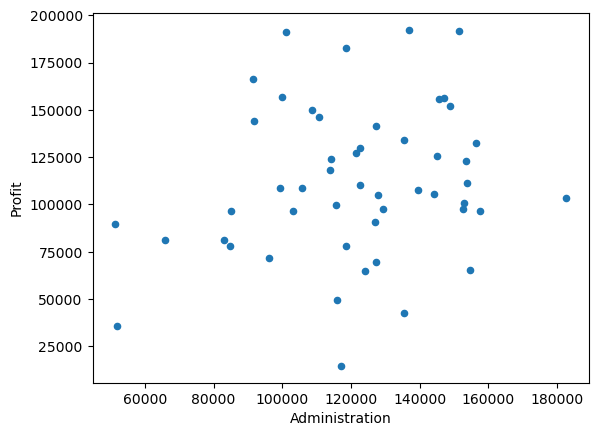

In [66]:
df.plot(kind='scatter',x='Administration',y='Profit')

In [67]:
x =df[['R&D Spend','Marketing Spend','Administration']]
y=df[['Profit']]
       

In [68]:
x['const']=1

In [69]:
x=x.drop(['R&D Spend','Marketing Spend','Administration'],axis=1)


In [70]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3,random_state=101)

In [71]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [72]:
model.score(x,y)

-0.004822309037153083

In [73]:
print( model.intercept_)
print( model.coef_)

[114783.484]
[[0.]]


In [74]:
df_comp=y_test
df_comp['predictions']=model.predict(x_test)
df_comp

,Profit,predictions
37,89949.14,114783.484
14,132602.65,114783.484
21,111313.02,114783.484
32,97427.84,114783.484
22,110352.25,114783.484
1,191792.06,114783.484
26,105733.54,114783.484
46,49490.75,114783.484
42,71498.49,114783.484
47,42559.73,114783.484


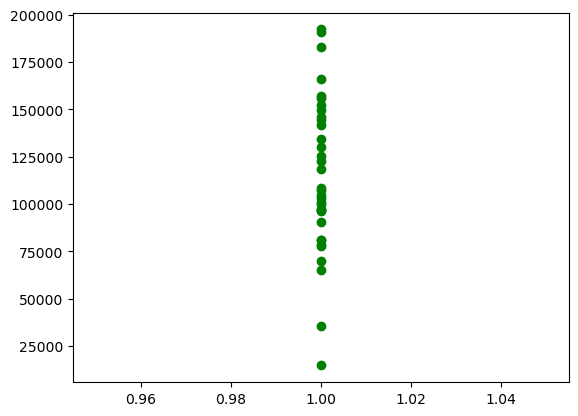

In [75]:
plt.scatter(x_train[['const']], y_train, color="g")

plt.plot(x_test[['const']], model.predict(x_test), color="k")